In [72]:
#pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas_datareader import data
from datetime import datetime
from matplotlib.ticker import FuncFormatter
from matplotlib import dates

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
#df_raw = yf.download("^GSPC MMM ABT ACN ADBE AAP AES AFL A AKAM AGN ADS ALL GOOG MO AMZN AEE AIG APH APC AIV AAPL AMAT APTV ADM ARNC \
#                  T BBY COF CPRI CAH KMX CCL COST XRAY DVN", start='2009-12-30', end='2020-01-01', interval='1wk')

#APC is removed because it has been delisted; ARNC is removed because it underwent unknown restructuring in 2016, which leads to data \
#inconsistency (get different numbers from different databases(e.g. Yahoo Finance and WSJ))

df_raw = yf.download("^GSPC MMM ABT ACN ADBE AAP AES AFL A AKAM AGN ADS ALL GOOG MO AMZN AEE AIG APH AIV AAPL AMAT APTV ADM \
                       T BBY COF CPRI CAH KMX CCL COST XRAY DVN", start='2009-12-21', end='2020-01-01', interval='1wk')

df_unadj_close = df_raw['Close']
df_unadj_close.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_unadj_close.dropna(how='all', inplace=True)

df_raw.drop(['Close'],axis=1,inplace=True)
df = df_raw.copy()
df_raw

[*********************100%***********************]  34 of 34 completed


C:\Users\Alaaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Adj Close                                                 \
                    A         AAP        AAPL        ABT         ACN   
Date                                                                   
2009-12-21  19.853561   40.208561   25.922182  18.125620   33.323753   
2009-12-28  20.337967   39.390865   26.131752  18.072063   33.412315   
2010-01-04  20.161219   39.546574   26.286753  18.426876   34.273785   
2010-01-11  19.919027   38.252357   25.536520  18.574158   34.467014   
2010-01-18  19.094250   38.670776   24.522150  18.526072   33.959789   
...               ...         ...         ...        ...         ...   
2019-12-02  82.036758  154.125870  270.069031  85.118484  201.769943   
2019-12-09  83.533600  154.713989  274.498535  85.984795  205.864120   
2019-12-16  85.010483  157.614685  278.778381  86.293495  210.287018   
2019-12-23  85.239998  157.903900  289.113831  87.030357  211.402710   
2019-12-30  85.130226  159.708801  292.954712  86.492645  209.759064   

                                                                     ...  \
                  ADBE        ADM         ADS        AEE        AES  ...   
Date                                                                 ...   
2009-12-21   37.169998  24.180721   61.544250  18.810987  10.952053  ...   
2009-12-28   36.779999  23.981581   61.649242  18.428570  10.494733  ...   
2010-01-04   36.689999  23.621582   64.598549  17.808790  10.865317  ...   
2010-01-11   35.869999  23.391798   62.651432  18.026373  11.070323  ...   
2010-01-18   34.380001  23.338188   58.528126  16.997801  10.266071  ...   
...                ...        ...         ...        ...        ...  ...   
2019-12-02  306.230011  43.567253  104.626213  74.240311  18.587982  ...   
2019-12-09  317.940002  44.847183  109.387367  74.072449  18.786573  ...   
2019-12-16  327.609985  45.432579  110.619904  76.105507  19.670296  ...   
2019-12-23  330.790009  45.938595  110.242195  75.837151  19.839096  ...   
2019-12-30  329.809998  45.988205  111.524422  76.334122  19.759661  ...   

                Volume                                                  \
                  COST        CPRI         DVN        GOOG         KMX   
Date                                                                     
2009-12-21   9767300.0         NaN   9802300.0  14821800.0   6894800.0   
2009-12-28   7084200.0         NaN  10106600.0  11659400.0   4778800.0   
2010-01-04  16654800.0         NaN  16495000.0  40306500.0   7824800.0   
2010-01-11  11222600.0         NaN  13778400.0  56686000.0   6529800.0   
2010-01-18  14720200.0         NaN  11337600.0  41505700.0   9191900.0   
...                ...         ...         ...         ...         ...   
2019-12-02   9772000.0  14017200.0  26211600.0   6719700.0   6072600.0   
2019-12-09  13214000.0   9725500.0  23586000.0   6129400.0   4577200.0   
2019-12-16  15394000.0  11532200.0  47580500.0   9558800.0  12627500.0   
2019-12-23   4394300.0   4028100.0  16198100.0   2936500.0   7605800.0   
2019-12-30   2789600.0   3377400.0   6941000.0   2012700.0   2678300.0   

                                                                          
                   MMM          MO            T       XRAY         ^GSPC  
Date                                                                      
2009-12-21   7436800.0  53903500.0   68914500.0  2129300.0  1.205305e+10  
2009-12-28  10864500.0  35913600.0   71130700.0  1940100.0  9.561710e+09  
2010-01-04  19035100.0  69903500.0  163499400.0  5309600.0  2.111535e+10  
2010-01-11  15650000.0  64944200.0  200954300.0  4194200.0  2.181623e+10  
2010-01-18  17763800.0  65847800.0  151503300.0  4684100.0  2.261833e+10  
...                ...         ...          ...        ...           ...  
2019-12-02  14372700.0  39482500.0  132364900.0  7487200.0  1.745239e+10  
2019-12-09  11558100.0  30362400.0  109393200.0  5598700.0  1.766988e+10  
2019-12-16  18130800.0  60067800.0  160659400.0  7495200.0  2.207813e+10  
2

In [3]:
#df[df['Adj Close']['A'].isnull()==True]
df = df.dropna(how='all')
df

Adj Close                                                 \
                    A         AAP        AAPL        ABT         ACN   
Date                                                                   
2009-12-21  19.853561   40.208561   25.922182  18.125620   33.323753   
2009-12-28  20.337967   39.390865   26.131752  18.072063   33.412315   
2010-01-04  20.161219   39.546574   26.286753  18.426876   34.273785   
2010-01-11  19.919027   38.252357   25.536520  18.574158   34.467014   
2010-01-18  19.094250   38.670776   24.522150  18.526072   33.959789   
...               ...         ...         ...        ...         ...   
2019-12-02  82.036758  154.125870  270.069031  85.118484  201.769943   
2019-12-09  83.533600  154.713989  274.498535  85.984795  205.864120   
2019-12-16  85.010483  157.614685  278.778381  86.293495  210.287018   
2019-12-23  85.239998  157.903900  289.113831  87.030357  211.402710   
2019-12-30  85.130226  159.708801  292.954712  86.492645  209.759064   

                                                                     ...  \
                  ADBE        ADM         ADS        AEE        AES  ...   
Date                                                                 ...   
2009-12-21   37.169998  24.180721   61.544250  18.810987  10.952053  ...   
2009-12-28   36.779999  23.981581   61.649242  18.428570  10.494733  ...   
2010-01-04   36.689999  23.621582   64.598549  17.808790  10.865317  ...   
2010-01-11   35.869999  23.391798   62.651432  18.026373  11.070323  ...   
2010-01-18   34.380001  23.338188   58.528126  16.997801  10.266071  ...   
...                ...        ...         ...        ...        ...  ...   
2019-12-02  306.230011  43.567253  104.626213  74.240311  18.587982  ...   
2019-12-09  317.940002  44.847183  109.387367  74.072449  18.786573  ...   
2019-12-16  327.609985  45.432579  110.619904  76.105507  19.670296  ...   
2019-12-23  330.790009  45.938595  110.242195  75.837151  19.839096  ...   
2019-12-30  329.809998  45.988205  111.524422  76.334122  19.759661  ...   

                Volume                                                  \
                  COST        CPRI         DVN        GOOG         KMX   
Date                                                                     
2009-12-21   9767300.0         NaN   9802300.0  14821800.0   6894800.0   
2009-12-28   7084200.0         NaN  10106600.0  11659400.0   4778800.0   
2010-01-04  16654800.0         NaN  16495000.0  40306500.0   7824800.0   
2010-01-11  11222600.0         NaN  13778400.0  56686000.0   6529800.0   
2010-01-18  14720200.0         NaN  11337600.0  41505700.0   9191900.0   
...                ...         ...         ...         ...         ...   
2019-12-02   9772000.0  14017200.0  26211600.0   6719700.0   6072600.0   
2019-12-09  13214000.0   9725500.0  23586000.0   6129400.0   4577200.0   
2019-12-16  15394000.0  11532200.0  47580500.0   9558800.0  12627500.0   
2019-12-23   4394300.0   4028100.0  16198100.0   2936500.0   7605800.0   
2019-12-30   2789600.0   3377400.0   6941000.0   2012700.0   2678300.0   

                                                                          
                   MMM          MO            T       XRAY         ^GSPC  
Date                                                                      
2009-12-21   7436800.0  53903500.0   68914500.0  2129300.0  1.205305e+10  
2009-12-28  10864500.0  35913600.0   71130700.0  1940100.0  9.561710e+09  
2010-01-04  19035100.0  69903500.0  163499400.0  5309600.0  2.111535e+10  
2010-01-11  15650000.0  64944200.0  200954300.0  4194200.0  2.181623e+10  
2010-01-18  17763800.0  65847800.0  151503300.0  4684100.0  2.261833e+10  
...                ...         ...          ...        ...           ...  
2019-12-02  14372700.0  39482500.0  132364900.0  7487200.0  1.745239e+10  
2019-12-09  11558100.0  30362400.0  109393200.0  5598700.0  1.766988e+10  
2019-12-16  18130800.0  60067800.0  160659400.0  7495200.0  2.207813e+10  
2

In [4]:
df_close = df['Adj Close']
df_close.rename(columns={'^GSPC':'GSPC'},inplace=True)

#df.reset_index(inplace=True)
#df.drop(0, inplace=True)
#df.set_index('Date',inplace=True)

df_close

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,COST,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-21,19.853561,40.208561,25.922182,18.125620,33.323753,37.169998,24.180721,61.544250,18.810987,10.952053,...,46.785721,NaN,63.557270,308.085236,24.230000,63.159489,11.769064,16.023712,33.008915,1126.479980
2009-12-28,20.337967,39.390865,26.131752,18.072063,33.412315,36.779999,23.981581,61.649242,18.428570,10.494733,...,45.832966,NaN,63.975037,308.832428,24.250000,63.251263,11.341519,15.983793,32.961678,1115.099976
2010-01-04,20.161219,39.546574,26.286753,18.426876,34.273785,36.689999,23.621582,64.598549,17.808790,10.865317,...,45.918163,NaN,66.255508,299.885956,24.309999,64.513718,11.816070,15.453469,33.364693,1144.979980
2010-01-11,19.919027,38.252357,25.536520,18.574158,34.467014,35.869999,23.391798,62.651432,18.026373,11.070323,...,45.538624,NaN,63.565952,288.917053,22.559999,63.786869,11.998218,14.926903,33.692715,1136.030029
2010-01-18,19.094250,38.670776,24.522150,18.526072,33.959789,34.380001,23.338188,58.528126,16.997801,10.266071,...,44.206306,NaN,60.319332,273.978058,21.290001,62.340828,11.581039,14.695388,32.277523,1091.760010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,82.036758,154.125870,270.069031,85.118484,201.769943,306.230011,43.567253,104.626213,74.240311,18.587982,...,294.329468,38.130001,22.804394,1340.619995,97.370003,169.931168,48.261158,37.695454,57.782959,3145.909912
2019-12-09,83.533600,154.713989,274.498535,85.984795,205.864120,317.940002,44.847183,109.387367,74.072449,18.786573,...,291.255920,38.779999,23.139462,1347.829956,97.879997,167.275208,48.021816,37.754658,56.120644,3168.800049
2019-12-16,85.010483,157.614685,278.778381,86.293495,210.287018,327.609985,45.432579,110.619904,76.105507,19.670296,...,294.209686,38.150002,25.197432,1349.589966,92.709999,173.796158,48.950470,38.632908,56.588482,3221.219971


In [5]:
tickers = ['GSPC', 'MMM', 'ABT', 'ACN', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'AKAM', 'AGN', 'ADS', 'ALL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AIG',\
           'APH', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'T', 'BBY', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'COST', 'XRAY', 'DVN']

df_ln_return = df_close.copy()

def calculate_ln_return(ticker):
    df_ln_return[ticker] = np.log(df_close[ticker]/df_close[ticker].shift(1))
    return None

for ticker in tickers:
    calculate_ln_return(ticker)

df_ln_return.dropna(how='all',inplace=True)
#df_ln_return.dropna(how='all',axis=1,inplace=True)
df_ln_return

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,COST,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-28,0.024106,-0.020546,0.008052,-0.002959,0.002654,-0.010548,-0.008270,0.001705,-0.020539,-0.042653,...,-0.020574,NaN,0.006552,0.002422,0.000825,0.001452,-0.037004,-0.002494,-0.001432,-0.010154
2010-01-04,-0.008729,0.003945,0.005914,0.019443,0.025456,-0.002450,-0.015125,0.046731,-0.034210,0.034702,...,0.001857,NaN,0.035026,-0.029397,0.002471,0.019763,0.040990,-0.033742,0.012153,0.026443
2010-01-11,-0.012085,-0.033274,-0.028956,0.007961,0.005622,-0.022603,-0.009775,-0.030605,0.012144,0.018692,...,-0.008300,NaN,-0.041441,-0.037263,-0.074709,-0.011331,0.015298,-0.034668,0.009783,-0.007847
2010-01-18,-0.042288,0.010879,-0.040533,-0.002592,-0.014826,-0.042426,-0.002294,-0.068079,-0.058752,-0.075424,...,-0.029693,NaN,-0.052425,-0.053092,-0.057941,-0.022931,-0.035389,-0.015631,-0.042911,-0.039749
2010-01-25,-0.039866,-0.007324,-0.029195,-0.029225,-0.028618,-0.062408,-0.016545,-0.030802,-0.008962,-0.030412,...,0.006288,NaN,-0.035096,-0.037173,-0.031491,-0.012224,0.007581,-0.001182,-0.026778,-0.016522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,0.017671,-0.015785,0.012863,0.000351,0.006886,-0.010719,0.022571,-0.015554,0.011504,-0.010098,...,-0.016343,0.026307,0.055533,0.026960,0.001130,0.009964,0.014185,0.021700,0.026356,0.001568
2019-12-09,0.018082,0.003809,0.016268,0.010126,0.020088,0.037526,0.028955,0.044501,-0.002264,0.010627,...,-0.010497,0.016903,0.014586,0.005364,0.005224,-0.015753,-0.004972,0.001569,-0.029190,0.007250
2019-12-16,0.017526,0.018575,0.015471,0.003584,0.021257,0.029961,0.012969,0.011205,0.027077,0.045967,...,0.010090,-0.016379,0.085203,0.001305,-0.054266,0.038243,0.019154,0.022996,0.008302,0.016407


In [6]:
df_ln_return = df_ln_return.T
df_ln_return.fillna(df_ln_return.mean(), inplace = True)
df_ln_return = df_ln_return.T
df_ln_return

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,COST,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-28,0.024106,-0.020546,0.008052,-0.002959,0.002654,-0.010548,-0.008270,0.001705,-0.020539,-0.042653,...,-0.020574,-0.010751,0.006552,0.002422,0.000825,0.001452,-0.037004,-0.002494,-0.001432,-0.010154
2010-01-04,-0.008729,0.003945,0.005914,0.019443,0.025456,-0.002450,-0.015125,0.046731,-0.034210,0.034702,...,0.001857,0.015597,0.035026,-0.029397,0.002471,0.019763,0.040990,-0.033742,0.012153,0.026443
2010-01-11,-0.012085,-0.033274,-0.028956,0.007961,0.005622,-0.022603,-0.009775,-0.030605,0.012144,0.018692,...,-0.008300,-0.013384,-0.041441,-0.037263,-0.074709,-0.011331,0.015298,-0.034668,0.009783,-0.007847
2010-01-18,-0.042288,0.010879,-0.040533,-0.002592,-0.014826,-0.042426,-0.002294,-0.068079,-0.058752,-0.075424,...,-0.029693,-0.041661,-0.052425,-0.053092,-0.057941,-0.022931,-0.035389,-0.015631,-0.042911,-0.039749
2010-01-25,-0.039866,-0.007324,-0.029195,-0.029225,-0.028618,-0.062408,-0.016545,-0.030802,-0.008962,-0.030412,...,0.006288,-0.019527,-0.035096,-0.037173,-0.031491,-0.012224,0.007581,-0.001182,-0.026778,-0.016522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,0.017671,-0.015785,0.012863,0.000351,0.006886,-0.010719,0.022571,-0.015554,0.011504,-0.010098,...,-0.016343,0.026307,0.055533,0.026960,0.001130,0.009964,0.014185,0.021700,0.026356,0.001568
2019-12-09,0.018082,0.003809,0.016268,0.010126,0.020088,0.037526,0.028955,0.044501,-0.002264,0.010627,...,-0.010497,0.016903,0.014586,0.005364,0.005224,-0.015753,-0.004972,0.001569,-0.029190,0.007250
2019-12-16,0.017526,0.018575,0.015471,0.003584,0.021257,0.029961,0.012969,0.011205,0.027077,0.045967,...,0.010090,-0.016379,0.085203,0.001305,-0.054266,0.038243,0.019154,0.022996,0.008302,0.016407


             A       AAP      AAPL       ABT       ACN      ADBE       ADM  \
A     1.000000  0.222775  0.428511  0.484196  0.589216  0.470620  0.414010   
AAP   0.222775  1.000000  0.224561  0.239979  0.213787  0.207289  0.241079   
AAPL  0.428511  0.224561  1.000000  0.330920  0.351751  0.372682  0.281418   
ABT   0.484196  0.239979  0.330920  1.000000  0.455908  0.409549  0.318075   
ACN   0.589216  0.213787  0.351751  0.455908  1.000000  0.411194  0.394023   

           ADS       AEE       AES  ...      COST      CPRI       DVN  \
A     0.439678  0.237512  0.458884  ...  0.392836  0.264536  0.416015   
AAP   0.271571  0.126992  0.210445  ...  0.232435  0.274031  0.220027   
AAPL  0.339484  0.120243  0.299976  ...  0.352143  0.253276  0.325577   
ABT   0.378529  0.219714  0.351317  ...  0.433972  0.184926  0.271032   
ACN   0.444442  0.245630  0.413307  ...  0.419796  0.210078  0.399062   

          GOOG       KMX       MMM        MO         T      XRAY      GSPC  
A     0.435276 

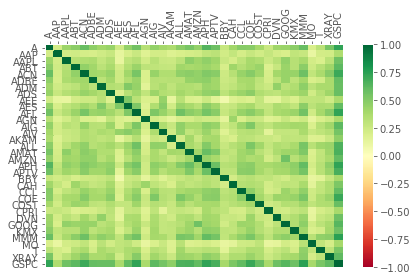

In [7]:
#correlation heatmap
def correlation_matrix(df):
    df_corr = df.corr()
    print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0])+0.5,minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5,minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_lables = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_lables)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    
correlation_matrix(df_ln_return)

In [8]:
def Split_Panel_Data_Preparations(df):
    df = df.T
    df.reset_index(inplace=True)
    df.rename(columns={'index':'Ticker'},inplace=True)
    for i in range(1,df.shape[1]):
        new_date=str(df.columns[i])[:4]+\
                 str(df.columns[i])[5:7]+\
                 str(df.columns[i])[8:10]
        df.rename(columns={df.columns[i]: str(i)+'_'+new_date},inplace=True)
    return df

In [9]:
df_ln_return_copy = df_ln_return.copy()
df_ln_return_copy = Split_Panel_Data_Preparations(df_ln_return_copy)
df_ln_return_copy.drop(33,inplace=True)
df_ln_return_copy

Date,Ticker,1_20091228,2_20100104,3_20100111,4_20100118,5_20100125,6_20100201,7_20100208,8_20100215,9_20100222,...,514_20191028,515_20191104,516_20191111,517_20191118,518_20191125,519_20191202,520_20191209,521_20191216,522_20191223,523_20191230
0,A,0.024106,-0.008729,-0.012085,-0.042288,-0.039866,0.039866,0.027390,0.039887,0.008299,...,0.020741,-0.004297,0.020917,0.010929,0.020640,0.017671,0.018082,0.017526,0.002696,-0.001289
1,AAP,-0.020546,0.003945,-0.033274,0.010879,-0.007324,0.031685,0.050052,-0.067892,0.019803,...,-0.004480,0.015532,-0.028724,-0.029890,-0.005017,-0.015785,0.003809,0.018575,0.001833,0.011366
2,AAPL,0.008052,0.005914,-0.028956,-0.040533,-0.029195,0.017547,0.024860,0.006417,0.014522,...,0.036788,0.016746,0.024371,-0.015089,0.020680,0.012863,0.016268,0.015471,0.036403,0.013198
3,ABT,-0.002959,0.019443,0.007961,-0.002592,-0.029225,0.019270,-0.000742,0.008309,-0.001841,...,0.012294,0.012981,0.023253,-0.023253,0.020215,0.000351,0.010126,0.003584,0.008503,-0.006198
4,ACN,0.002654,0.025456,0.005622,-0.014826,-0.028618,-0.011039,-0.001234,0.009341,-0.022267,...,0.027743,0.007832,0.036795,-0.000762,0.022624,0.006886,0.020088,0.021257,0.005292,-0.007805
5,ADBE,-0.010548,-0.002450,-0.022603,-0.042426,-0.062408,0.014446,-0.041114,0.074426,0.022473,...,0.024928,0.051354,0.017086,0.006032,0.033609,-0.010719,0.037526,0.029961,0.009660,-0.002967
6,ADM,-0.008270,-0.015125,-0.009775,-0.002294,-0.016545,0.021130,-0.027825,0.006028,-0.014845,...,0.034040,0.020528,-0.010211,-0.003505,0.013061,0.022571,0.028955,0.012969,0.011076,0.001079
7,ADS,0.001705,0.046731,-0.030605,-0.068079,-0.030802,-0.072531,-0.026385,0.054556,-0.025643,...,-0.036339,0.065491,-0.042117,0.015047,0.023662,-0.015554,0.044501,0.011205,-0.003420,0.011564
8,AEE,-0.020539,-0.034210,0.012144,-0.058752,-0.008962,-0.027377,-0.012141,0.043425,-0.037336,...,0.010003,-0.046976,0.037364,-0.022037,-0.008307,0.011504,-0.002264,0.027077,-0.003532,0.006532
9,AES,-0.042653,0.034702,0.018692,-0.075424,-0.030412,-0.073925,0.003404,0.034241,-0.041061,...,0.041393,0.015360,0.044895,0.020387,0.004240,-0.010098,0.010627,0.045967,0.008545,-0.004012


In [10]:
for i in range(df_ln_return_copy.shape[1]-1):
    exec("df_ln_return_%s=df_ln_return_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ln_return_%s.rename(columns={df_ln_return_copy.columns[i+1]:'ln_return'},inplace=True)"%(i+1))
    exec("df_ln_return_%s.rename(columns={'Ticker':df_ln_return_copy.columns[i+1]},inplace=True)"%(i+1))

In [11]:
#df_ln_return_3.set_index('Ticker', inplace=True)
#df_ln_return_3.rename_axis(index='abc', 'def'])
df_ln_return_1
#df_ln_return_255.set_index(df_ln_return_255.columns[0])

Date,1_20091228,ln_return
0,A,0.024106
1,AAP,-0.020546
2,AAPL,0.008052
3,ABT,-0.002959
4,ACN,0.002654
5,ADBE,-0.010548
6,ADM,-0.008270
7,ADS,0.001705
8,AEE,-0.020539
9,AES,-0.042653


In [12]:
df_vol = df_ln_return.rolling(window=50, min_periods=50).std() #49行NaN
df_vol_copy = df_vol.copy()
df_vol_copy = Split_Panel_Data_Preparations(df_vol_copy)
df_vol_copy.drop(33,inplace=True)
df_vol_copy

Date,Ticker,1_20091228,2_20100104,3_20100111,4_20100118,5_20100125,6_20100201,7_20100208,8_20100215,9_20100222,...,514_20191028,515_20191104,516_20191111,517_20191118,518_20191125,519_20191202,520_20191209,521_20191216,522_20191223,523_20191230
0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.036429,0.035864,0.035037,0.034768,0.034788,0.032034,0.031669,0.031684,0.030170,0.030069
1,AAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.036141,0.036195,0.036400,0.035703,0.035569,0.033835,0.033626,0.033593,0.033589,0.032846
2,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.038912,0.034717,0.034569,0.033398,0.033204,0.029674,0.029481,0.028001,0.028130,0.028033
3,ABT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.032165,0.031035,0.029000,0.027945,0.028020,0.026895,0.025918,0.025014,0.024953,0.024743
4,ACN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.028792,0.027762,0.027469,0.026602,0.026605,0.018751,0.018766,0.018858,0.018436,0.018315
5,ADBE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035667,0.035220,0.032108,0.031070,0.030821,0.027159,0.026174,0.026359,0.025670,0.025216
6,ADM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031134,0.031074,0.030884,0.030505,0.030559,0.027872,0.028125,0.028020,0.027676,0.027475
7,ADS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.053191,0.054340,0.054200,0.052687,0.052718,0.048667,0.049177,0.047801,0.047417,0.047192
8,AEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.018575,0.019547,0.020119,0.020134,0.020130,0.019450,0.018874,0.019126,0.019090,0.018832
9,AES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.030288,0.029876,0.030175,0.030261,0.030091,0.026280,0.026153,0.026615,0.025875,0.025904


In [13]:
for i in range(df_vol_copy.shape[1]-1):
    exec("df_vol_%s=df_vol_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_vol_%s.rename(columns={df_vol_copy.columns[i+1]:'vol'},inplace=True)"%(i+1))
    exec("df_vol_%s.rename(columns={'Ticker':df_vol_copy.columns[i+1]},inplace=True)"%(i+1))

In [14]:
df_vol_50

Date,50_20101206,vol
0,A,0.044705
1,AAP,0.029200
2,AAPL,0.041863
3,ABT,0.020143
4,ACN,0.029554
5,ADBE,0.049907
6,ADM,0.032554
7,ADS,0.048831
8,AEE,0.031424
9,AES,0.051017


In [15]:
#Market Beta 1
df_ff = pd.read_csv("FF3/F-F_Research_Data_Factors_weekly.csv")
df_ff = df_ff.iloc[:,0:5]
df_ff

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,2009-12-24,2.35,1.58,0.08,0.001
1,2009-12-31,-1.01,-0.25,-0.14,0.001
2,2010-1-8,2.89,0.26,3.90,0.001
3,2010-1-15,-0.91,0.11,-1.51,0.001
4,2010-1-22,-3.57,0.84,-1.86,0.001
...,...,...,...,...,...
518,2019-11-29,1.13,1.54,-1.60,0.031
519,2019-12-6,0.10,0.48,0.74,0.035
520,2019-12-13,0.74,0.17,0.75,0.035
521,2019-12-20,1.71,0.35,0.00,0.035


In [16]:
#Market Beta 2
df_excess_return = df_ln_return.copy()
df_excess_return.reset_index(inplace=True)
df_excess_return['RF'] = df_ff['RF']
df_excess_return.set_index('Date',inplace=True)
for i in range(df_excess_return.shape[1]-2):
    df_excess_return.iloc[:,i] = df_excess_return.iloc[:,i]-df_excess_return['RF']
df_excess_return

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC,RF
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-28,0.023106,-0.021546,0.007052,-0.003959,0.001654,-0.011548,-0.009270,0.000705,-0.021539,-0.043653,...,-0.011751,0.005552,0.001422,-0.000175,0.000452,-0.038004,-0.003494,-0.002432,-0.010154,0.001
2010-01-04,-0.009729,0.002945,0.004914,0.018443,0.024456,-0.003450,-0.016125,0.045731,-0.035210,0.033702,...,0.014597,0.034026,-0.030397,0.001471,0.018763,0.039990,-0.034742,0.011153,0.026443,0.001
2010-01-11,-0.013085,-0.034274,-0.029956,0.006961,0.004622,-0.023603,-0.010775,-0.031605,0.011144,0.017692,...,-0.014384,-0.042441,-0.038263,-0.075709,-0.012331,0.014298,-0.035668,0.008783,-0.007847,0.001
2010-01-18,-0.043288,0.009879,-0.041533,-0.003592,-0.015826,-0.043426,-0.003294,-0.069079,-0.059752,-0.076424,...,-0.042661,-0.053425,-0.054092,-0.058941,-0.023931,-0.036389,-0.016631,-0.043911,-0.039749,0.001
2010-01-25,-0.040866,-0.008324,-0.030195,-0.030225,-0.029618,-0.063408,-0.017545,-0.031802,-0.009962,-0.031412,...,-0.020527,-0.036096,-0.038173,-0.032491,-0.013224,0.006581,-0.002182,-0.027778,-0.016522,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,-0.013329,-0.046785,-0.018137,-0.030649,-0.024114,-0.041719,-0.008429,-0.046554,-0.019496,-0.041098,...,-0.004693,0.024533,-0.004040,-0.029870,-0.021036,-0.016815,-0.009300,-0.004644,0.001568,0.031
2019-12-09,-0.016918,-0.031191,-0.018732,-0.024874,-0.014912,0.002526,-0.006045,0.009501,-0.037264,-0.024373,...,-0.018097,-0.020414,-0.029636,-0.029776,-0.050753,-0.039972,-0.033431,-0.064190,0.007250,0.035
2019-12-16,-0.017474,-0.016425,-0.019529,-0.031416,-0.013743,-0.005039,-0.022031,-0.023795,-0.007923,0.010967,...,-0.051379,0.050203,-0.033695,-0.089266,0.003243,-0.015846,-0.012004,-0.026698,0.016407,0.035


In [17]:
#Market Beta 3
df_temp = df_excess_return.rolling(window=50, min_periods=50).mean() #获得49行NaN
df_beta = df_excess_return.copy()
df_beta.iloc[:49] = df_temp.iloc[:49]
df_beta.reset_index(inplace=True)

In [18]:
#Market Beta 4
df_beta = pd.read_csv("df_beta.csv")
df_beta.set_index('Date', inplace=True)
df_beta

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC,RF
Date,,,,,,,,,,,,,,,,,,,,,
12/28/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/4/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/11/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/18/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/25/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/2/2019,1.2634,1.0317,1.2274,0.9805,0.7203,1.1479,0.9756,1.2669,0.2586,0.7505,...,2.1518,2.2052,0.9717,0.9874,1.2112,0.4073,0.7583,0.6676,1.0,0.031
12/9/2019,1.2453,1.0319,1.2361,0.9261,0.7330,1.0880,1.0204,1.3055,0.3366,0.8292,...,2.2024,2.2415,0.9070,0.9388,1.2015,0.4355,0.7937,0.6331,1.0,0.035
12/16/2019,1.2868,1.0294,1.3418,1.0063,0.7526,1.1103,1.0244,1.2428,0.3577,0.8260,...,2.1911,2.1779,0.8951,0.9485,1.2094,0.3944,0.7417,0.5872,1.0,0.035


In [ ]:
#Market Beta 4
#523-(50-1)=474

def Calculate_Market_Beta(ticker):
    for i in range(474):
        df_cal_beta = df_excess_return[i:(i+49)]
        Exog = sm.add_constant(df_cal_beta['GSPC'], prepend=False)
        model = sm.OLS(df_cal_beta[ticker], Exog, data=df_cal_beta)
        res = model.fit()
        #print(res.summary())
        results_as_html = res.summary().tables[1].as_html()
        beta = pd.read_html(results_as_html, header=0, index_col=0)[0]['coef'][0]

        df_beta.loc[i+49,ticker] = beta
    return None

for ticker in tickers:
    Calculate_Market_Beta(ticker)

df_beta.to_csv('df_beta.csv')

df_beta.set_index('Date',inplace=True)

In [19]:
#Market Beta 5
df_beta_copy = df_beta.copy()
df_beta_copy = Split_Panel_Data_Preparations(df_beta_copy)
df_beta_copy.drop([33,34], inplace=True)
df_beta_copy

Date,Ticker,1_12/2/209,2_1/4/01,3_1/11200,4_1/18200,5_1/25200,6_2/1/01,7_2/8/01,8_2/15200,9_2/22200,...,514_10/2/219,515_11/4209,516_11/1/219,517_11/1/219,518_11/2/219,519_12/2209,520_12/9209,521_12/1/219,522_12/2/219,523_12/3/219
0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0175,1.1888,1.1760,1.2662,1.2568,1.2634,1.2453,1.2868,1.2291,1.2730
1,AAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9137,0.9667,1.0537,1.0394,1.0352,1.0317,1.0319,1.0294,1.0911,1.0520
2,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3260,1.2179,1.2751,1.2797,1.2719,1.2274,1.2361,1.3418,1.3754,1.4346
3,ABT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0053,0.9793,0.9011,0.8735,0.8935,0.9805,0.9261,1.0063,1.0292,1.0464
4,ACN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0317,1.0275,1.0311,1.0604,1.0522,0.7203,0.7330,0.7526,0.7564,0.7669
5,ADBE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3018,1.3010,1.2149,1.2390,1.2105,1.1479,1.0880,1.1103,1.1073,1.1061
6,ADM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9014,0.9465,0.9852,1.0326,1.0420,0.9756,1.0204,1.0244,1.0249,1.0465
7,ADS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3690,1.4582,1.5290,1.4813,1.4542,1.2669,1.3055,1.2428,1.2376,1.2364
8,AEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2591,0.2432,0.2298,0.3484,0.3444,0.2586,0.3366,0.3577,0.3940,0.3811
9,AES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7754,0.7920,0.8077,0.9381,0.9559,0.7505,0.8292,0.8260,0.8305,0.8839


In [20]:
#Market Beta 6
for i in range(df_beta_copy.shape[1]-1):
    exec("df_beta_%s=df_beta_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_beta_%s.rename(columns={df_beta_copy.columns[i+1]:'beta'},inplace=True)"%(i+1))
    exec("df_beta_%s.rename(columns={'Ticker':df_beta_copy.columns[i+1]},inplace=True)"%(i+1))

In [21]:
print(df_beta_1, df_beta_49)
df_beta_50

Date 1_12/2/209  beta
0             A   NaN
1           AAP   NaN
2          AAPL   NaN
3           ABT   NaN
4           ACN   NaN
5          ADBE   NaN
6           ADM   NaN
7           ADS   NaN
8           AEE   NaN
9           AES   NaN
10          AFL   NaN
11          AGN   NaN
12          AIG   NaN
13          AIV   NaN
14         AKAM   NaN
15          ALL   NaN
16         AMAT   NaN
17         AMZN   NaN
18          APH   NaN
19         APTV   NaN
20          BBY   NaN
21          CAH   NaN
22          CCL   NaN
23          COF   NaN
24         COST   NaN
25         CPRI   NaN
26          DVN   NaN
27         GOOG   NaN
28          KMX   NaN
29          MMM   NaN
30           MO   NaN
31            T   NaN
32         XRAY   NaN Date 49_11/2/210  beta
0              A   NaN
1            AAP   NaN
2           AAPL   NaN
3            ABT   NaN
4            ACN   NaN
5           ADBE   NaN
6            ADM   NaN
7            ADS   NaN
8            AEE   NaN
9            AES   NaN

Date,50_12/6200,beta
0,A,1.4621
1,AAP,0.1074
2,AAPL,1.3285
3,ABT,0.5539
4,ACN,0.8197
5,ADBE,1.0689
6,ADM,0.7393
7,ADS,1.3942
8,AEE,0.8666
9,AES,1.6712


In [22]:
#ATR
df_H = df['High']
df_H.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_L = df['Low']
df_L.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_HL = df_H - df_L
df_HC = (df_H - df_unadj_close.shift(1)).abs()
df_LC = (df_L - df_unadj_close.shift(1)).abs()

df_ATR = df_HL
for i in range(df_ATR.shape[0]):
    for j in range(df_ATR.shape[1]):
        df_ATR.iloc[i,j] = max(df_HL.iloc[i,j], df_HC.iloc[i,j], df_LC.iloc[i,j])

df_ATR = df_ATR[1:]
df_ATR = df_ATR.T
df_ATR.fillna(df_ATR.mean(), inplace = True)
df_ATR = df_ATR.T
df_ATR.dropna(how='all',inplace=True)
df_ATR

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,COST,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-28,1.323320,1.180000,0.805714,0.494194,0.669998,0.799999,0.639999,1.549999,0.719999,0.660000,...,1.639999,1.803071,2.030006,3.975098,0.530001,1.779999,0.740002,0.590000,0.540001,15.569946
2010-01-04,0.879829,1.490002,0.934284,0.719700,1.560001,1.459999,1.369999,3.880005,1.440001,0.690001,...,1.599998,3.330576,3.290001,20.124573,1.080000,2.900002,0.559999,1.850000,1.040001,30.290039
2010-01-11,0.937052,1.980000,1.271429,0.369446,1.419998,1.389999,1.020000,2.599998,0.580000,0.570000,...,1.160000,2.660653,3.920006,15.222961,1.940001,1.729996,0.609999,1.570000,1.470001,19.020020
2010-01-18,1.444921,2.259998,2.627142,1.146723,2.000000,2.670002,1.120001,6.340004,1.990000,1.220000,...,2.239998,5.151248,4.529999,27.676270,1.800001,3.869995,0.869999,0.889999,2.439999,60.269897
2010-01-25,1.237482,1.580002,3.351429,1.257076,1.600002,2.810001,1.189999,2.840000,0.580000,1.009999,...,1.790001,3.512357,5.040001,12.154449,1.209999,3.779999,0.420000,1.090000,1.369999,32.099976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,3.250000,7.750000,14.709991,2.640007,6.350006,12.579987,1.459999,6.919998,2.040001,0.299999,...,7.700012,3.599998,2.160000,65.000000,4.139999,9.270004,1.090000,1.670002,2.510002,80.270020
2019-12-09,3.430000,7.339996,10.389984,2.949997,6.380005,21.010010,1.669998,8.510002,1.330002,0.590000,...,8.660004,2.300003,1.339998,23.409912,3.370003,5.139999,1.130001,0.750000,1.939999,56.589844
2019-12-16,1.949997,5.460007,7.500000,3.239998,11.190002,12.059998,2.330002,4.230003,2.099998,1.150000,...,4.859985,2.450001,2.070000,17.170044,7.190002,7.279999,1.570000,1.000000,1.629997,56.849854


In [23]:
df_ATR_copy = df_ATR.copy()
df_ATR_copy = Split_Panel_Data_Preparations(df_ATR_copy)
df_ATR_copy.drop(33, inplace=True)
df_ATR_copy

Date,Ticker,1_20091228,2_20100104,3_20100111,4_20100118,5_20100125,6_20100201,7_20100208,8_20100215,9_20100222,...,514_20191028,515_20191104,516_20191111,517_20191118,518_20191125,519_20191202,520_20191209,521_20191216,522_20191223,523_20191230
0,A,1.323320,0.879829,0.937052,1.444921,1.237482,1.330471,1.409157,0.929899,0.922747,...,2.409996,2.909996,2.180000,2.180000,3.379997,3.250000,3.430000,1.949997,0.919998,0.779999
1,AAP,1.180000,1.490002,1.980000,2.259998,1.580002,2.279999,2.480000,4.000000,1.029999,...,6.910004,6.770004,17.669998,7.239990,3.930008,7.750000,7.339996,5.460007,5.160004,2.880005
2,AAPL,0.805714,0.934284,1.271429,2.627142,3.351429,1.335714,1.091429,0.561430,1.351429,...,18.669998,5.070007,7.500000,7.600006,6.220001,14.709991,10.389984,7.500000,14.529999,8.459991
3,ABT,0.494194,0.719700,0.369446,1.146723,1.257076,0.882832,0.638134,0.590155,0.446213,...,2.699997,2.989998,2.440002,3.540001,2.230003,2.640007,2.949997,3.239998,1.470001,1.520004
4,ACN,0.669998,1.560001,1.419998,2.000000,1.600002,2.139999,1.169998,1.189999,1.540001,...,5.980011,4.720001,9.009995,4.659988,5.000000,6.350006,6.380005,11.190002,3.790009,3.190002
5,ADBE,0.799999,1.459999,1.389999,2.670002,2.810001,1.580000,2.269999,2.879999,1.500000,...,13.449982,17.430023,7.799988,6.250000,10.700012,12.579987,21.010010,12.059998,5.619995,5.619995
6,ADM,0.639999,1.369999,1.020000,1.120001,1.189999,2.150000,1.280001,0.799999,0.969999,...,2.060001,1.349998,1.019997,1.050003,0.549999,1.459999,1.669998,2.330002,0.870003,0.480000
7,ADS,1.549999,3.880005,2.599998,6.340004,2.840000,9.450001,3.579998,4.119999,2.779999,...,10.490005,7.670006,7.960007,5.709999,5.149994,6.919998,8.510002,4.230003,2.449997,3.260002
8,AEE,0.719999,1.440001,0.580000,1.990000,0.580000,1.330000,0.850000,1.690001,1.170000,...,2.269997,4.020004,3.230003,2.750000,1.430000,2.040001,1.330002,2.099998,1.260002,0.989998
9,AES,0.660000,0.690001,0.570000,1.220000,1.009999,1.720000,0.710000,0.490001,0.780000,...,0.790001,0.719999,0.920000,0.550001,0.450001,0.299999,0.590000,1.150000,0.309999,0.360001


In [24]:
for i in range(df_ATR_copy.shape[1]-1):
    exec("df_ATR_%s=df_ATR_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ATR_%s.rename(columns={df_ATR_copy.columns[i+1]:'ATR'},inplace=True)"%(i+1))
    exec("df_ATR_%s.rename(columns={'Ticker':df_ATR_copy.columns[i+1]},inplace=True)"%(i+1))

In [25]:
#Technical Factors
df_excess_sp500_return = df_ln_return.copy()
for i in range(df_excess_sp500_return.shape[1]):
    df_excess_sp500_return.iloc[:,i] = df_excess_sp500_return.iloc[:,i] - df_excess_sp500_return['GSPC']
df_excess_sp500_return_1wk = df_excess_sp500_return.shift(1)
df_excess_sp500_return_1mo = df_excess_sp500_return.rolling(window=4, min_periods=4).sum()
df_excess_sp500_return_1yr = df_excess_sp500_return.rolling(window=50, min_periods=50).sum()

In [26]:
df_excess_sp500_return_1wk = Split_Panel_Data_Preparations(df_excess_sp500_return_1wk)
df_excess_sp500_return_1mo = Split_Panel_Data_Preparations(df_excess_sp500_return_1mo)
df_excess_sp500_return_1yr = Split_Panel_Data_Preparations(df_excess_sp500_return_1yr)

for i in range(df_excess_sp500_return_1wk.shape[1]-1):
    exec("df_excess_sp500_return_1wk_%s=df_excess_sp500_return_1wk.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1wk_%s.rename(columns={df_excess_sp500_return_1wk.columns[i+1]:'exsp_return_1wk'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1wk_%s.rename(columns={'Ticker':df_excess_sp500_return_1wk.columns[i+1]},inplace=True)"%(i+1))

for i in range(df_excess_sp500_return_1mo.shape[1]-1):
    exec("df_excess_sp500_return_1mo_%s=df_excess_sp500_return_1mo.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1mo_%s.rename(columns={df_excess_sp500_return_1mo.columns[i+1]:'exsp_return_1mo'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1mo_%s.rename(columns={'Ticker':df_excess_sp500_return_1mo.columns[i+1]},inplace=True)"%(i+1))

for i in range(df_excess_sp500_return_1yr.shape[1]-1):
    exec("df_excess_sp500_return_1yr_%s=df_excess_sp500_return_1yr.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1yr_%s.rename(columns={df_excess_sp500_return_1yr.columns[i+1]:'exsp_return_1yr'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1yr_%s.rename(columns={'Ticker':df_excess_sp500_return_1yr.columns[i+1]},inplace=True)"%(i+1))

In [27]:
#Liquidity Factor
df_volume = df['Volume'][1:]
df_volume.drop(['^GSPC'],axis=1,inplace=True)
#df_volume.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_volume

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,COF,COST,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-28,17501000.0,4523400.0,4.635666e+08,31519400.0,9835200.0,10691200.0,7519600.0,1481000.0,3007200.0,12486700.0,...,8549000.0,7084200.0,NaN,10106600.0,11659400.0,4778800.0,10864500.0,35913600.0,71130700.0,1940100.0
2010-01-04,18074200.0,7257400.0,6.431341e+08,57798300.0,21127800.0,28161300.0,24173800.0,4141400.0,6492800.0,39689100.0,...,33111200.0,16654800.0,NaN,16495000.0,40306500.0,7824800.0,19035100.0,69903500.0,163499400.0,5309600.0
2010-01-11,21861700.0,5655700.0,6.723857e+08,57540300.0,22332500.0,24903900.0,19560800.0,3128500.0,5799900.0,29717600.0,...,29395200.0,11222600.0,NaN,13778400.0,56686000.0,6529800.0,15650000.0,64944200.0,200954300.0,4194200.0
2010-01-18,18497000.0,7086700.0,7.080206e+08,62660600.0,19235200.0,27348300.0,27028300.0,5533100.0,9546800.0,23519300.0,...,48856600.0,14720200.0,NaN,11337600.0,41505700.0,9191900.0,17763800.0,65847800.0,151503300.0,4684100.0
2010-01-25,21527500.0,5838700.0,1.768708e+09,81719900.0,21078400.0,37010300.0,30459800.0,4867600.0,8521700.0,45496600.0,...,61490600.0,18608200.0,NaN,18530300.0,40369000.0,7342200.0,22759200.0,76580200.0,214041800.0,5562000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,9128100.0,8170400.0,1.141498e+08,18051400.0,6890000.0,9453800.0,14081400.0,3982700.0,6133400.0,29703500.0,...,10494700.0,9772000.0,14017200.0,26211600.0,6719700.0,6072600.0,14372700.0,39482500.0,132364900.0,7487200.0
2019-12-09,10431800.0,5834400.0,1.420294e+08,19096600.0,8629900.0,17687700.0,14381900.0,4095700.0,6869000.0,23260900.0,...,11278400.0,13214000.0,9725500.0,23586000.0,6129400.0,4577200.0,11558100.0,30362400.0,109393200.0,5598700.0
2019-12-16,9033700.0,4169700.0,1.831800e+08,31293500.0,15991200.0,14895600.0,22523100.0,4933400.0,16177700.0,42552000.0,...,11917900.0,15394000.0,11532200.0,47580500.0,9558800.0,12627500.0,18130800.0,60067800.0,160659400.0,7495200.0


In [28]:
df_MktCap = pd.read_csv("df_MktCap.csv")
df_MktCap.drop(['ARNC'],axis=1,inplace=True)
df_MktCap.set_index('Date',inplace=True)
df_MktCap

,ALL,AMZN,ADBE,AAP,AKAM,ADS,APH,AAPL,XRAY,GOOG,...,DVN,MMM,MO,COF,AIV,KMX,AEE,ACN,APTV,CPRI
Date,,,,,,,,,,,,,,,,,,,,,
12/28/2009,15461.3,55629.6,19557.2,3872.3,4369.3,3379.5,7405.2,176019.6,5234.6,189226.4,...,30891.6,57323.4,40719.0,17772.0,1804.2,5179.7,6633.8,26163.4,7070.4,5199.1
1/4/2010,15461.3,55629.6,19557.2,3872.3,4369.3,3379.5,7405.2,176019.6,5234.6,189226.4,...,30891.6,57323.4,40719.0,17772.0,1804.2,5179.7,6633.8,26163.4,7070.4,5199.1
1/11/2010,15461.3,55629.6,19557.2,3872.3,4369.3,3379.5,7405.2,176019.6,5234.6,189226.4,...,30891.6,57323.4,40719.0,17772.0,1804.2,5179.7,6633.8,26163.4,7070.4,5199.1
1/18/2010,15461.3,55629.6,19557.2,3872.3,4369.3,3379.5,7405.2,176019.6,5234.6,189226.4,...,30891.6,57323.4,40719.0,17772.0,1804.2,5179.7,6633.8,26163.4,7070.4,5199.1
1/25/2010,15461.3,55629.6,19557.2,3872.3,4369.3,3379.5,7405.2,176019.6,5234.6,189226.4,...,30891.6,57323.4,40719.0,17772.0,1804.2,5179.7,6633.8,26163.4,7070.4,5199.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/2/2019,35776.6,858678.3,133726.7,11739.6,15076.1,5900.0,28703.7,1012160.7,11951.2,845993.1,...,9848.8,94575.9,76405.1,42790.9,7762.8,14509.9,19676.6,122554.1,22396.4,5026.4
12/9/2019,35776.6,858678.3,133726.7,11739.6,15076.1,5900.0,28703.7,1012160.7,11951.2,845993.1,...,9848.8,94575.9,76405.1,42790.9,7762.8,14509.9,19676.6,122554.1,22396.4,5026.4
12/16/2019,35776.6,858678.3,133726.7,11739.6,15076.1,5900.0,28703.7,1012160.7,11951.2,845993.1,...,9848.8,94575.9,76405.1,42790.9,7762.8,14509.9,19676.6,122554.1,22396.4,5026.4


In [29]:
df_volume_MktCap_ratio = df_volume.copy()
for ticker in df_volume.columns:
    df_volume_MktCap_ratio[ticker] = df_volume[ticker].rolling(window=50, min_periods=50).mean()/df_MktCap[ticker]
df_volume_MktCap_ratio

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,COF,COST,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,445.473360,468.656854,134.502701,171.684508,73.071419,96.891541,719.658840,668.186441,355.145503,2447.588432,...,259.448481,74.620059,2675.457186,3460.900008,8.148849,524.325736,140.174061,640.817825,538.579210,686.447386
2019-12-09,448.407261,472.217111,133.531891,170.950296,72.930453,97.154465,721.061251,675.793898,358.150392,2447.142423,...,259.742983,75.120391,2675.887713,3444.918569,8.116726,520.360857,140.441085,635.839388,531.471167,683.566504
2019-12-16,445.742816,470.834611,132.765560,170.624649,74.074078,97.384516,730.606910,682.367458,369.192340,2479.587363,...,259.571778,76.048859,2679.689639,3473.715580,8.178142,530.249416,142.026669,641.239420,530.663049,679.820604


In [30]:
df_volume_MktCap_ratio_copy = df_volume_MktCap_ratio.copy()
df_volume_MktCap_ratio_copy = Split_Panel_Data_Preparations(df_volume_MktCap_ratio_copy)
df_volume_MktCap_ratio_copy.fillna(df_volume_MktCap_ratio_copy.mean(), inplace = True)
df_volume_MktCap_ratio_copy

Date,Ticker,1_20091228,2_20100104,3_20100111,4_20100118,5_20100125,6_20100201,7_20100208,8_20100215,9_20100222,...,514_20191028,515_20191104,516_20191111,517_20191118,518_20191125,519_20191202,520_20191209,521_20191216,522_20191223,523_20191230
0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,469.701406,461.529022,456.098589,452.361045,450.788252,445.473360,448.407261,445.742816,439.803411,389.371280
1,AAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,461.699888,464.666939,473.024464,472.131418,467.324611,468.656854,472.217111,470.834611,461.559508,481.327300
2,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,144.902382,143.746271,141.801589,140.743052,137.931890,134.502701,133.531891,132.765560,130.649362,99.908359
3,ABT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,180.119084,180.554592,178.588460,177.545913,175.859390,171.684508,170.950296,170.624649,166.640749,156.954549
4,ACN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.648499,78.552035,77.494168,76.218829,75.431960,73.071419,72.930453,74.074078,73.190566,65.972758
5,ADBE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.140384,106.571044,104.665635,103.541821,100.467341,96.891541,97.154465,97.384516,95.703356,78.915880
6,ADM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,742.003768,743.996870,744.408063,740.487172,727.978702,719.658840,721.061251,730.606910,719.127340,628.444718
7,ADS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,645.953559,656.875932,662.356610,671.060000,670.935593,668.186441,675.793898,682.367458,673.862034,761.652637
8,AEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,352.399297,355.829666,358.041735,360.164561,359.954464,355.145503,358.150392,369.192340,365.917689,376.183984
9,AES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2479.020586,2495.629880,2501.701990,2532.162658,2511.566012,2447.588432,2447.142423,2479.587363,2454.637560,1983.576430


In [31]:
for i in range(df_volume_MktCap_ratio_copy.shape[1]-1):
    exec("df_volume_MktCap_ratio_%s=df_volume_MktCap_ratio_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_volume_MktCap_ratio_%s.rename(columns={df_volume_MktCap_ratio_copy.columns[i+1]:'Liquidity'},inplace=True)"%(i+1))
    exec("df_volume_MktCap_ratio_%s.rename(columns={'Ticker':df_volume_MktCap_ratio_copy.columns[i+1]},inplace=True)"%(i+1))
df_volume_MktCap_ratio_50

Date,50_20101206,Liquidity
0,A,2067.741037
1,AAP,1224.552349
2,AAPL,2871.868739
3,ABT,976.021850
4,ACN,787.476512
5,ADBE,3305.423643
6,ADM,1340.922263
7,ADS,1718.038896
8,AEE,1427.974801
9,AES,3815.246391


In [32]:
#Price Level Factor
df_EPS = pd.read_csv('df_EPS.csv')
df_EPS.drop(['ARNC'], axis=1, inplace=True)
df_EPS.set_index('Date',inplace=True)
df_EPS

,ALL,AMZN,ADBE,AAP,AKAM,ADS,APH,AAPL,XRAY,GOOG,...,DVN,MMM,MO,COF,AIV,KMX,AEE,ACN,APTV,CPRI
Date,,,,,,,,,,,,,,,,,,,,,
12/28/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/4/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/11/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/18/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/25/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/2/2019,108.6774,1735.755609,276.237761,165.346479,91.370303,128.26087,96.515467,223.968999,53.305977,1220.065042,...,24.062546,164.394055,40.899898,90.986392,52.134318,87.992116,80.051261,192.362424,87.417642,33.155673
12/9/2019,108.6774,1735.755609,276.237761,165.346479,91.370303,128.26087,96.515467,223.968999,53.305977,1220.065042,...,24.062546,164.394055,40.899898,90.986392,52.134318,87.992116,80.051261,192.362424,87.417642,33.155673
12/16/2019,108.6774,1735.755609,276.237761,165.346479,91.370303,128.26087,96.515467,223.968999,53.305977,1220.065042,...,24.062546,164.394055,40.899898,90.986392,52.134318,87.992116,80.051261,192.362424,87.417642,33.155673


In [33]:
df_earningstoprice_ratio = df_close.copy()
for ticker in df_EPS.columns:
    df_earningstoprice_ratio[ticker] = df_EPS[ticker]/df_close[ticker]

df_earningstoprice_ratio_copy = df_earningstoprice_ratio.copy()
df_earningstoprice_ratio_copy = Split_Panel_Data_Preparations(df_earningstoprice_ratio_copy)
df_earningstoprice_ratio_copy.drop(33, inplace=True)
df_earningstoprice_ratio_copy.fillna(df_earningstoprice_ratio_copy.mean(), inplace = True)

for i in range(df_earningstoprice_ratio_copy.shape[1]-1):
    exec("df_earningstoprice_ratio_%s=df_earningstoprice_ratio_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_earningstoprice_ratio_%s.rename(columns={df_earningstoprice_ratio_copy.columns[i+1]:'E2P'},inplace=True)"%(i+1))
    exec("df_earningstoprice_ratio_%s.rename(columns={'Ticker':df_earningstoprice_ratio_copy.columns[i+1]},inplace=True)"%(i+1))
df_earningstoprice_ratio_50

Date,50_20101129,E2P
0,A,1.360048
1,AAP,0.880287
2,AAPL,1.029762
3,ABT,3.073660
4,ACN,1.171384
5,ADBE,0.897413
6,ADM,1.343357
7,ADS,1.003451
8,AEE,1.409460
9,AES,1.262721


In [34]:
#Growth Factor
df_ROA = pd.read_csv('df_ROA.csv')
df_ROA.drop(['ARNC'], axis=1, inplace=True)
df_ROA.set_index('Date',inplace=True)
df_ROA.index = df_ln_return.index
df_ROA

,ALL,AMZN,ADBE,AAP,AKAM,ADS,APH,AAPL,XRAY,GOOG,...,DVN,MMM,MO,COF,AIV,KMX,AEE,ACN,APTV,CPRI
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-28,-0.002,0.079,0.070,0.097,0.085,0.053,0.100,0.175,0.083,0.140,...,0.020,0.107,0.136,-0.005,0.006,0.107,0.040,0.153,0.068,0.258
2010-01-04,-0.002,0.079,0.070,0.097,0.085,0.053,0.100,0.175,0.083,0.140,...,0.020,0.107,0.136,-0.005,0.006,0.107,0.040,0.153,0.068,0.258
2010-01-11,-0.002,0.079,0.070,0.097,0.085,0.053,0.100,0.175,0.083,0.140,...,0.020,0.107,0.136,-0.005,0.006,0.107,0.040,0.153,0.068,0.258
2010-01-18,-0.002,0.079,0.070,0.097,0.085,0.053,0.100,0.175,0.083,0.140,...,0.020,0.107,0.136,-0.005,0.006,0.107,0.040,0.153,0.068,0.258
2010-01-25,-0.002,0.079,0.070,0.097,0.085,0.053,0.100,0.175,0.083,0.140,...,0.020,0.107,0.136,-0.005,0.006,0.107,0.040,0.153,0.068,0.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,0.020,0.058,0.103,0.046,0.062,0.030,0.106,0.120,0.024,0.088,...,0.043,0.107,0.126,0.016,0.019,0.041,0.031,0.150,0.072,0.084
2019-12-09,0.020,0.058,0.103,0.046,0.062,0.030,0.106,0.120,0.024,0.088,...,0.043,0.107,0.126,0.016,0.019,0.041,0.031,0.150,0.072,0.084
2019-12-16,0.020,0.058,0.103,0.046,0.062,0.030,0.106,0.120,0.024,0.088,...,0.043,0.107,0.126,0.016,0.019,0.041,0.031,0.150,0.072,0.084


In [35]:
df_ROA_copy = df_ROA.copy()
df_ROA_copy = Split_Panel_Data_Preparations(df_ROA_copy)
df_ROA_copy.fillna(df_ROA_copy.mean(), inplace = True)

for i in range(df_ROA_copy.shape[1]-1):
    exec("df_ROA_%s=df_ROA_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ROA_%s.rename(columns={df_ROA_copy.columns[i+1]:'ROA'},inplace=True)"%(i+1))
    exec("df_ROA_%s.rename(columns={'Ticker':df_ROA_copy.columns[i+1]},inplace=True)"%(i+1))
df_ROA_1

Date,1_20091228,ROA
0,ALL,-0.002
1,AMZN,0.079
2,ADBE,0.070
3,AAP,0.097
4,AKAM,0.085
5,ADS,0.053
6,APH,0.100
7,AAPL,0.175
8,XRAY,0.083
9,GOOG,0.140


In [36]:
df_ROA_523

Date,523_20191230,ROA
0,ALL,0.020
1,AMZN,0.058
2,ADBE,0.103
3,AAP,0.046
4,AKAM,0.062
5,ADS,0.030
6,APH,0.106
7,AAPL,0.120
8,XRAY,0.024
9,GOOG,0.088


In [37]:
for i in range(df_ln_return_copy.shape[1]-1):
    exec("df_ln_return_%s['vol']=df_vol_%s['vol']"%(i+1,i+1))
    exec("df_ln_return_%s['beta']=df_beta_%s['beta']"%(i+1,i+1))
    exec("df_ln_return_%s['ATR']=df_ATR_%s['ATR']"%(i+1,i+1))
    exec("df_ln_return_%s['exsp_return_1wk']=df_excess_sp500_return_1wk_%s['exsp_return_1wk']"%(i+1,i+1))
    exec("df_ln_return_%s['exsp_return_1mo']=df_excess_sp500_return_1mo_%s['exsp_return_1mo']"%(i+1,i+1))
    exec("df_ln_return_%s['exsp_return_1yr']=df_excess_sp500_return_1yr_%s['exsp_return_1yr']"%(i+1,i+1))
    exec("df_ln_return_%s['Liquidity']=df_volume_MktCap_ratio_%s['Liquidity']"%(i+1,i+1))
    exec("df_ln_return_%s['E2P']=df_earningstoprice_ratio_%s['E2P']"%(i+1,i+1))
    exec("df_ln_return_%s['ROA']=df_ROA_%s['ROA']"%(i+1,i+1))


C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_res = pd.read_csv('df_res.csv')
df_res.rename(columns={'Unnamed: 0':' '},inplace=True)
df_res.set_index(' ', inplace=True)
df_res

,1,2,3,4,5,6,7,8,9,10,...,465,466,467,468,469,470,471,472,473,474
,,,,,,,,,,,,,,,,,,,,,
vol_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
exsp_return_1wk_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
exsp_return_1mo_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
exsp_return_1yr_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Liquidity_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2P_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ROA_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vol_p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
exsp_return_1wk_p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_res = pd.read_csv('df_res.csv')
df_res.rename(columns={'Unnamed: 0':' '},inplace=True)
df_res.set_index(' ', inplace=True)

for i in range(50,524):
#from 12/06/2010 to 12/30/2019
    exec("Exog = sm.add_constant(df_ln_return_%s[['vol', 'exsp_return_1wk', 'exsp_return_1mo', 'exsp_return_1yr', 'Liquidity', 'E2P', 'ROA']],\
                                 prepend=False)"%i)
    exec("model = sm.OLS(df_ln_return_%s['ln_return'], Exog, data=df_ln_return_%s)"%(i,i))
    res = model.fit()
    res_as_html = res.summary().tables[1].as_html()
    res_as_df = pd.read_html(res_as_html, header=0, index_col=0)[0]
    res_as_html_2 = res.summary().tables[0].as_html()
    res_as_df_2 = pd.read_html(res_as_html_2, header=0, index_col=0)[0]

    vol_coef = res_as_df['coef'][0]
    exsp_return_1wk_coef = res_as_df['coef'][1]
    exsp_return_1mo_coef = res_as_df['coef'][2]
    exsp_return_1yr_coef = res_as_df['coef'][3]
    Liquidity_coef = res_as_df['coef'][4]
    E2P_coef = res_as_df['coef'][5]
    ROA_coef = res_as_df['coef'][6]

    df_res.iloc[0,i-50] = vol_coef
    df_res.iloc[1,i-50] = exsp_return_1wk_coef
    df_res.iloc[2,i-50] = exsp_return_1mo_coef
    df_res.iloc[3,i-50] = exsp_return_1yr_coef
    df_res.iloc[4,i-50] = Liquidity_coef
    df_res.iloc[5,i-50] = E2P_coef
    df_res.iloc[6,i-50] = ROA_coef

    vol_p = res_as_df['P>|t|'][0]
    exsp_return_1wk_p = res_as_df['P>|t|'][1]
    exsp_return_1mo_p = res_as_df['P>|t|'][2]
    exsp_return_1yr_p = res_as_df['P>|t|'][3]
    Liquidity_p = res_as_df['P>|t|'][4]
    E2P_p = res_as_df['P>|t|'][5]
    ROA_p = res_as_df['P>|t|'][6]

    df_res.iloc[7,i-50] = vol_p
    df_res.iloc[8,i-50] = exsp_return_1wk_p
    df_res.iloc[9,i-50] = exsp_return_1mo_p
    df_res.iloc[10,i-50] = exsp_return_1yr_p
    df_res.iloc[11,i-50] = Liquidity_p
    df_res.iloc[12,i-50] = E2P_p
    df_res.iloc[13,i-50] = ROA_p

    Adj_R2 = res_as_df_2.iloc[0,2]
    Prob_F = res_as_df_2.iloc[2,2]

    df_res.iloc[14,i-50] = Adj_R2
    df_res.iloc[15,i-50] = Prob_F

C:\Users\Alaaa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
df_res_copy = df_res.T
df_res_copy

,vol_coef,exsp_return_1wk_coef,exsp_return_1mo_coef,exsp_return_1yr_coef,Liquidity_coef,E2P_coef,ROA_coef,vol_p,exsp_return_1wk_p,exsp_return_1mo_p,exsp_return_1yr_p,Liquidity_p,E2P_p,ROA_p,Adj_R2,Prob_F
1,0.5100,-0.3715,0.6693,-0.0400,-1.524000e-06,0.0233,-0.0173,0.212,0.077,0.000,0.079,0.634,0.036,0.833,0.499,6.070000e-04
2,-0.8436,-0.4337,0.7429,-0.0206,-1.137000e-06,0.0070,-0.1424,0.036,0.013,0.000,0.313,0.714,0.516,0.076,0.801,1.200000e-08
3,-0.5139,-0.6670,0.4564,-0.0314,2.009000e-06,-0.0079,-0.1618,0.215,0.000,0.000,0.156,0.527,0.477,0.049,0.608,3.810000e-05
4,0.2486,0.0277,0.1126,0.0136,7.264000e-07,0.0120,-0.0119,0.188,0.705,0.001,0.234,0.701,0.030,0.760,0.447,1.790000e-03
5,1.5339,-0.7127,0.2624,-0.0232,-1.505000e-06,0.0180,0.0748,0.001,0.057,0.001,0.328,0.697,0.133,0.336,0.459,1.410000e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0.6444,-0.2291,0.3094,0.0118,1.615000e-06,0.0617,-0.0162,0.075,0.135,0.006,0.558,0.757,0.309,0.838,0.266,3.350000e-02
471,0.5094,-0.4453,0.4170,0.0287,2.004000e-06,0.0589,-0.0771,0.108,0.011,0.000,0.130,0.649,0.177,0.267,0.540,2.310000e-04
472,-0.2795,-0.4498,0.5069,0.0238,7.829000e-06,0.1433,0.0091,0.387,0.022,0.000,0.164,0.067,0.001,0.894,0.673,4.560000e-06
473,-0.4993,-0.0528,0.2366,-0.0098,-3.644000e-06,-0.0018,-0.0011,0.085,0.769,0.019,0.558,0.343,0.965,0.986,0.356,9.090000e-03


In [90]:
df_coef_ma = df_res_copy.rolling(window=25, min_periods=25).mean()[49:]

#Cross-section regression used rolling on a basis of 50, so the first 49 cross-sections are removed; prediction used another rolling,
#so 50 to 98 cross-sections are removed. Also, we cannot add realized return for the last cross-section.
for i in range(99, 523):
    
    for j in df_coef_ma.columns[:7]:
        exec("df_ln_return_%s[j] = df_coef_ma.loc[str(%d),j]"%(i,i-49))
        
    exec("df_ln_return_%s['E_return'] = df_ln_return_%s['vol']*df_ln_return_%s['vol_coef'] + \
                                        df_ln_return_%s['exsp_return_1wk']*df_ln_return_%s['exsp_return_1wk_coef'] + \
                                        df_ln_return_%s['exsp_return_1mo']*df_ln_return_%s['exsp_return_1mo_coef'] + \
                                        df_ln_return_%s['exsp_return_1yr']*df_ln_return_%s['exsp_return_1yr_coef'] + \
                                        df_ln_return_%s['Liquidity']*df_ln_return_%s['Liquidity_coef'] + \
                                        df_ln_return_%s['E2P']*df_ln_return_%s['E2P_coef'] + \
                                        df_ln_return_%s['ROA']*df_ln_return_%s['ROA_coef']"%(i,i,i,i,i,i,i,i,i,i,i,i,i,i,i))
    exec("df_ln_return_%s['Realized_return'] = df_ln_return_%s['ln_return']"%(i,i+1))


C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
df_ln_return_99.sort_values(by='E_return', ascending=False)[0:11]['E_return'].mean()
df_ln_return_99.sort_values(by='E_return', ascending=False)[11:22]['E_return'].mean()
df_ln_return_99.sort_values(by='E_return', ascending=False)[22:33]['E_return'].mean()
df_ln_return_99.sort_values(by='E_return', ascending=False)[0:11]['Realized_return'].mean()
df_ln_return_99.sort_values(by='E_return', ascending=False)[11:22]['Realized_return'].mean()
df_ln_return_99.sort_values(by='E_return', ascending=False)[22:33]['Realized_return'].mean()



-0.01759441300588344

In [43]:
Dates = df_ln_return.index
Dates[0].strftime('%D')

'12/28/09'

In [84]:
df_ln_return_100.sort_values(by='E_return', ascending=False)

Date,100_20111121,ln_return,vol,beta,ATR,exsp_return_1wk,exsp_return_1mo,exsp_return_1yr,Liquidity,E2P,ROA,vol_coef,exsp_return_1wk_coef,exsp_return_1mo_coef,exsp_return_1yr_coef,Liquidity_coef,E2P_coef,ROA_coef,E_return,Realized_return
1,AAP,-0.011992,0.037315,0.4398,1.909996,0.005168,0.125694,0.060417,1298.590103,0.872623,0.052,-0.02925,-0.3453,0.351772,0.000976,1.174310e-07,0.003561,-0.005402,0.044377,0.028196
8,AEE,-0.024453,0.021497,0.4801,1.010000,0.017437,0.081584,0.221817,1289.419549,1.267339,0.076,-0.02925,-0.3453,0.351772,0.000976,1.174310e-07,0.003561,-0.005402,0.026519,0.030012
20,BBY,-0.054293,0.048566,0.6564,1.519999,0.001527,0.070175,-0.400328,4420.666943,1.090874,0.045,-0.02925,-0.3453,0.351772,0.000976,1.174310e-07,0.003561,-0.005402,0.026508,0.074052
30,MO,-0.014210,0.016631,0.2050,0.639999,0.033831,0.092244,0.220184,1133.937633,1.478549,0.156,-0.02925,-0.3453,0.351772,0.000976,1.174310e-07,0.003561,-0.005402,0.025051,0.041687
3,ABT,-0.027851,0.020885,0.3852,0.705305,0.020188,0.062711,0.234385,1092.069625,2.465057,0.109,-0.02925,-0.3453,0.351772,0.000976,1.174310e-07,0.003561,-0.005402,0.023023,0.039553
14,AKAM,-0.061183,0.069194,1.4485,1.910000,-0.028845,0.030997,-0.600165,6993.899165,0.710670,0.069,-0.02925,-0.3453,0.351772,0.000976,1.174310e-07,0.003561,-0.005402,0.021234,0.097347
24,COST,-0.011075,0.024559,0.5020,1.809998,0.025716,0.056809,0.205884,346.420395,1.265413,0.126,-0.02925,-0.3453,0.351772,0.000976,1.174310e-07,0.003561,-0.005402,0.014452,0.070575
29,MMM,-0.056311,0.033630,1.0392,5.050003,0.017387,0.041549,-0.015423,392.100727,1.115010,0.038,-0.02925,-0.3453,0.351772,0.000976,1.174310e-07,0.003561,-0.005402,0.011424,0.053620
27,GOOG,-0.055080,0.045258,1.0753,16.712372,0.016493,0.039673,0.017579,177.567169,0.869000,0.010,-0.02925,-0.3453,0.351772,0.000976,1.174310e-07,0.003561,-0.005402,0.010015,0.097020
9,AES,-0.057809,0.042250,1.1545,0.790000,0.036334,0.054294,0.041469,4009.600723,1.053472,0.124,-0.02925,-0.3453,0.351772,0.000976,1.174310e-07,0.003561,-0.005402,0.008910,0.073850


In [91]:
dict_tiers = {'Expected_return': {}, 'Realized_return':{}, 'Volatility':{}}

for i in range(99,523):
    exec("df_sort = df_ln_return_%s.sort_values(by='E_return', ascending=False)"%i)
    dict_tiers['Expected_return'][i] = {}
    dict_tiers['Realized_return'][i] = {}
    dict_tiers['Volatility'][i] = {}
    
    dict_tiers['Expected_return'][i][1] = df_sort[0:3]['E_return'].mean()
    dict_tiers['Expected_return'][i][2] = df_sort[3:6]['E_return'].mean()
    dict_tiers['Expected_return'][i][3] = df_sort[6:9]['E_return'].mean()
    dict_tiers['Expected_return'][i][4] = df_sort[9:12]['E_return'].mean()
    dict_tiers['Expected_return'][i][5] = df_sort[12:15]['E_return'].mean()
    dict_tiers['Expected_return'][i][6] = df_sort[15:18]['E_return'].mean()
    dict_tiers['Expected_return'][i][7] = df_sort[18:21]['E_return'].mean()
    dict_tiers['Expected_return'][i][8] = df_sort[21:24]['E_return'].mean()
    dict_tiers['Expected_return'][i][9] = df_sort[24:27]['E_return'].mean()
    dict_tiers['Expected_return'][i][10] = df_sort[27:30]['E_return'].mean()
    dict_tiers['Expected_return'][i][11] = df_sort[30:33]['E_return'].mean()

    dict_tiers['Realized_return'][i][1] = df_sort[0:3]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][2] = df_sort[3:6]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][3] = df_sort[6:9]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][4] = df_sort[9:12]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][5] = df_sort[12:15]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][6] = df_sort[15:18]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][7] = df_sort[18:21]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][8] = df_sort[21:24]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][9] = df_sort[24:27]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][10] = df_sort[27:30]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][11] = df_sort[30:33]['Realized_return'].mean()

    dict_tiers['Volatility'][i][1] = df_sort[0:3]['vol'].mean()
    dict_tiers['Volatility'][i][2] = df_sort[3:6]['vol'].mean()
    dict_tiers['Volatility'][i][3] = df_sort[6:9]['vol'].mean()
    dict_tiers['Volatility'][i][4] = df_sort[9:12]['vol'].mean()
    dict_tiers['Volatility'][i][5] = df_sort[12:15]['vol'].mean()
    dict_tiers['Volatility'][i][6] = df_sort[15:18]['vol'].mean()
    dict_tiers['Volatility'][i][7] = df_sort[18:21]['vol'].mean()
    dict_tiers['Volatility'][i][8] = df_sort[21:24]['vol'].mean()
    dict_tiers['Volatility'][i][9] = df_sort[24:27]['vol'].mean()
    dict_tiers['Volatility'][i][10] = df_sort[27:30]['vol'].mean()
    dict_tiers['Volatility'][i][11] = df_sort[30:33]['vol'].mean()

df_E_return_tiers = pd.DataFrame(dict_tiers['Expected_return']).T
df_R_return_tiers = pd.DataFrame(dict_tiers['Realized_return']).T
df_vol_tiers = pd.DataFrame(dict_tiers['Volatility']).T

# df_E_return_tiers.rename(columns={1:'high', 2:'medium', 3:'low'}, inplace = True)
# df_R_return_tiers.rename(columns={1:'high', 2:'medium', 3:'low'}, inplace = True)
# df_vol_tiers.rename(columns={1:'high', 2:'medium', 3:'low'}, inplace = True)

df_R_return_tiers['Difference'] = df_R_return_tiers[1] - df_R_return_tiers[11]
df_vol_tiers['Difference'] = df_vol_tiers[1] - df_vol_tiers[11]

df_E_return_tiers['dates'] = Dates[98:522]
df_R_return_tiers['dates'] = Dates[98:522]
df_vol_tiers['dates'] = Dates[98:522]

In [92]:
df_R_return_tiers.to_csv('df_R_return_tiers.csv')

PermissionError: [Errno 13] Permission denied: 'df_R_return_tiers.csv'

In [83]:
df_vol_tiers.to_csv('df_vol_tiers.csv')

In [93]:
(df_R_return_tiers['Difference'].skew(), df_R_return_tiers['Difference'].mean())

(0.21324902310030297, -0.002750614334082254)

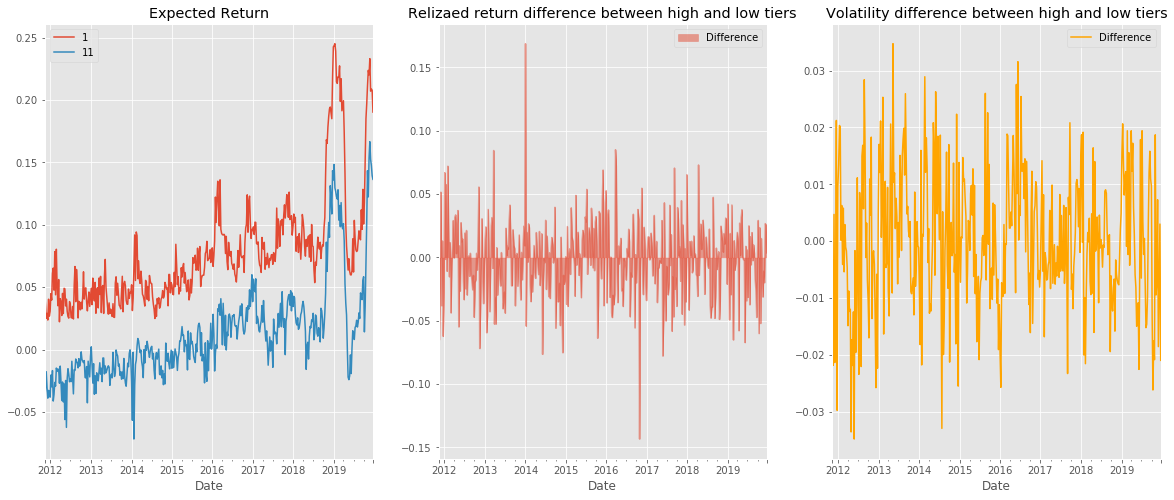

In [94]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

df_E_return_tiers.plot(x = 'dates', y = [1, 11], ax = ax0)
ax0.set(title = 'Expected Return', xlabel = 'Date')
ax0.legend(loc=0)

df_R_return_tiers.plot(kind = 'area', x = 'dates', y = 'Difference', ax = ax1, stacked = False)
ax1.set(title = 'Relizaed return difference between high and low tiers', xlabel = 'Date')
# ax1.set_xticklabels([t if not i%20 else "" for i,t in enumerate(ax1.get_xticklabels())])
# plt.gca().xaxis.set_major_locator(dates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%b\n%Y"))
ax1.legend(loc=0)

df_vol_tiers.plot(x = 'dates', y = 'Difference', ax = ax2, color = 'orange')
ax2.set(title = 'Volatility difference between high and low tiers', xlabel = 'Date')
ax2.legend(loc=0)

In [ ]:
# def PlotReturns(df):
#     data = df_E_return_tiers.values
#     fig = plt.figure()
#     ax = fig.add_subplot(1,1,1)
    
#     heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
#     fig.colorbar(heatmap)
#     ax.set_xticks(np.arange(data.shape[0])+0.5,minor=False)
#     ax.set_yticks(np.arange(data.shape[1])+0.5,minor=False)
#     ax.invert_yaxis()
#     ax.xaxis.tick_top()
    
#     column_lables = df_corr.columns
#     row_labels = df_corr.index
    
#     ax.set_xticklabels(column_lables)
#     ax.set_yticklabels(row_labels)
#     plt.xticks(rotation=90)
#     heatmap.set_clim(-1,1)
#     plt.tight_layout()
#     plt.show()
    
# correlation_matrix(df_ln_return)

In [283]:
dict_tiers2 = {'Expected_return': {}, 'Realized_return':{}, 'Volatility':{}}

for i in range(99,523):
    exec("df_sort = df_ln_return_%s.sort_values(by='vol', ascending=False)"%i)
    dict_tiers2['Expected_return'][i] = {}
    dict_tiers2['Realized_return'][i] = {}
    dict_tiers2['Volatility'][i] = {}
    dict_tiers2['Expected_return'][i][1] = df_sort[0:11]['E_return'].mean()
    dict_tiers2['Expected_return'][i][2] = df_sort[11:22]['E_return'].mean()
    dict_tiers2['Expected_return'][i][3] = df_sort[22:33]['E_return'].mean()
    dict_tiers2['Realized_return'][i][1] = df_sort[0:11]['Realized_return'].mean()
    dict_tiers2['Realized_return'][i][2] = df_sort[11:22]['Realized_return'].mean()
    dict_tiers2['Realized_return'][i][3] = df_sort[22:33]['Realized_return'].mean()
    dict_tiers2['Volatility'][i][1] = df_sort[0:11]['vol'].mean()
    dict_tiers2['Volatility'][i][2] = df_sort[11:22]['vol'].mean()
    dict_tiers2['Volatility'][i][3] = df_sort[22:33]['vol'].mean()

df_E_return_tiers2 = pd.DataFrame(dict_tiers2['Expected_return']).T
df_R_return_tiers2 = pd.DataFrame(dict_tiers2['Realized_return']).T
df_vol_tiers2 = pd.DataFrame(dict_tiers2['Volatility']).T

df_E_return_tiers2.rename(columns={1:'high', 2:'medium', 3:'low'}, inplace = True)
df_R_return_tiers2.rename(columns={1:'high', 2:'medium', 3:'low'}, inplace = True)
df_vol_tiers2.rename(columns={1:'high', 2:'medium', 3:'low'}, inplace = True)

df_R_return_tiers2['Difference'] = df_R_return_tiers2['high'] - df_R_return_tiers2['low']
df_vol_tiers2['Difference'] = df_vol_tiers2['high'] - df_vol_tiers2['low']

df_E_return_tiers2['dates'] = Dates[98:522]
df_R_return_tiers2['dates'] = Dates[98:522]
df_vol_tiers2['dates'] = Dates[98:522]

In [290]:
df_R_return_tiers2['Difference'].skew()
df_R_return_tiers2['Difference'].mean()

-0.0008712803080118327

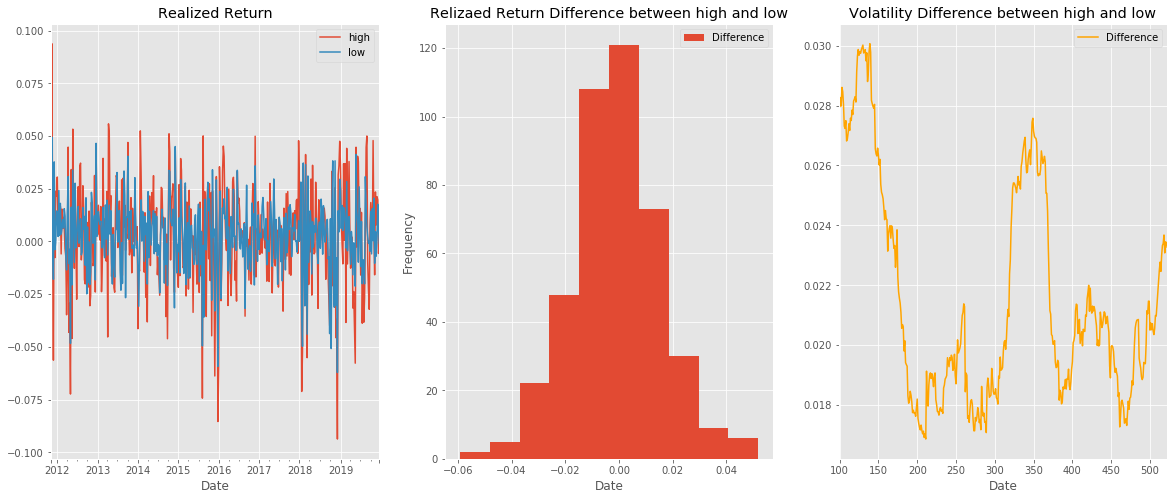

In [293]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

df_R_return_tiers2.plot(x = 'dates', y = ['high', 'low'], ax = ax0)
ax0.set(title = 'Realized Return', xlabel = 'Date')
ax0.legend(loc=0)

df_R_return_tiers2.plot(kind = 'hist', y = 'Difference', ax = ax1)
ax1.set(title = 'Relizaed Return Difference between high and low', xlabel = 'Date')
ax1.legend(loc=0)

df_vol_tiers2.plot(y = 'Difference', ax = ax2, color = 'orange')
ax2.set(title = 'Volatility Difference between high and low', xlabel = 'Date')
ax2.legend(loc=0)

In [ ]:
#Get Financial Statements Data - obsolete 
from urllib.request import urlopen
import json

def get_fin_stmts(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return pd.DataFrame(json.loads(data))

for i in range(2,len(tickers)):
    if i == 2:
        df_NI = get_fin_stmts(("https://fmpcloud.io/api/v3/income-statement/" + \
                               tickers[i] + \
                               "?period=quarter&apikey=a9bfc0b2c9456894e2382247982dddac"))[['date', 'netIncome']]
        df_ROA = get_fin_stmts(("https://fmpcloud.io/api/v3/ratios/" + \
                                ticker + \
                                "?period=quarter&apikey=a9bfc0b2c9456894e2382247982dddac"))[['date', 'returnOnAssets']]
        df_EV = get_fin_stmts(("https://fmpcloud.io/api/v3/enterprise-values/" + \
                               ticker + \
                               "?period=quarter&apikey=a9bfc0b2c9456894e2382247982dddac"))
        df_NOS = df_EV[['date', 'numberOfShares']]
        df_MktCap = df_EV[['date', 'numberOfShares']]
    else:
        df_NI[tickers[i]] = get_fin_stmts(("https://fmpcloud.io/api/v3/income-statement/" + \
                                           tickers[i] + \
                                           "?period=quarter&apikey=a9bfc0b2c9456894e2382247982dddac"))['netIncome']
        df_ROA[tickers[i]] = get_fin_stmts(("https://fmpcloud.io/api/v3/ratios/" + \
                                            ticker + \
                                            "?period=quarter&apikey=a9bfc0b2c9456894e2382247982dddac"))['returnOnAssets']
        df_EV = get_fin_stmts(("https://fmpcloud.io/api/v3/enterprise-values/" + \
                                           ticker + \
                                           "?period=quarter&apikey=a9bfc0b2c9456894e2382247982dddac"))
        df_NOS[tickers[i]] = df_EV['numberOfShares']
        df_MktCap[tickers[i]] = df_EV['numberOfShares']


In [ ]:
#Market Beta Draft
df_excess_return_1 = df_excess_return[:50]
Exog = sm.add_constant(df_excess_return_1['GSPC'], prepend=False)
model = sm.OLS(df_excess_return_1['AAPL'], Exog, data=df_excess_return_1)
res = model.fit()
print(res.summary())
results_as_html = res.summary().tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0]['coef'][0]

In [ ]:
#Cross-section regression draft
Exog = sm.add_constant(df_ln_return_50[['vol', 'exsp_return_1wk', 'exsp_return_1mo', 'exsp_return_1yr', 'Liquidity', 'E2P', 'ROA']],\
                       prepend=False)
model = sm.OLS(df_ln_return_50['ln_return'], Exog, data=df_ln_return_50)
res = model.fit()
res_as_html = res.summary().tables[1].as_html()
res_as_df = pd.read_html(res_as_html, header=0, index_col=0)[0]
res_as_html_2 = res.summary().tables[0].as_html()
res_as_df_2 = pd.read_html(res_as_html_2, header=0, index_col=0)[0]

vol_coef = res_as_df['coef'][0]
exsp_return_1wk_coef = res_as_df['coef'][1]
exsp_return_1mo_coef = res_as_df['coef'][2]
exsp_return_1yr_coef = res_as_df['coef'][3]
Liquidity_coef = res_as_df['coef'][4]
E2P_coef = res_as_df['coef'][5]
ROA_coef = res_as_df['coef'][6]

vol_p = res_as_df['P>|t|'][0]
exsp_return_1wk_coef = res_as_df['P>|t|'][1]
exsp_return_1mo_coef = res_as_df['P>|t|'][2]
exsp_return_1yr_coef = res_as_df['P>|t|'][3]
Liquidity_coef = res_as_df['P>|t|'][4]
E2P_coef = res_as_df['P>|t|'][5]
ROA_coef = res_as_df['P>|t|'][6]

Adj_R2 = res_as_df_2.iloc[0,2]
Prob_F = res_as_df_2.iloc[2,2]


In [ ]:
#循环的几种写法
#1
tickers = ['^GSPC', 'MMM', 'ABT', 'ACN', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'AKAM', 'AGN', 'ADS', 'ALL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AIG',\
           'APH', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'T', 'BBY', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'COST', 'XRAY', 'DVN']

df_ln_return = df_close.copy()

def calculate_ln_return(ticker):
    df_ln_return[ticker] = np.log(df_close[ticker]/df_close[ticker].shift(1))
    return None

map(calculate_ln_return, tickers)

df_ln_return.dropna(how='all',inplace=True)
df_ln_return.dropna(how='all',axis=1,inplace=True)
df_ln_return

#2
def calculate_log_return_1(ticker):
    df3c[ticker] = np.log(df3[ticker]/df3[ticker].shift(1))
    return None

for ticker in tickers:
    calculate_log_return_1(ticker)
#3    
#calculate_log_return('MMM')
df3c = df3c.dropna(how='all')
df3c

def calculate_log_return_2(*args):
    for arg in args:
        df4c[arg] = np.log(df4[arg]/df4[arg].shift(1))
    return None

calculate_log_return_2('^GSPC', 'MMM', 'ABT', 'ACN', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'AKAM', 'AGN', 'ADS', 'ALL', 'GOOG', 'MO', 'AMZN',\
                      'AEE', 'AIG', 'APH', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'T', 'BBY', 'COF', 'CPRI', 'CAH', 'KMX',\
                      'CCL', 'COST', 'XRAY', 'DVN')
df4c = df4c.dropna(how='all')
df4c
#There is no point in trying to convert a list tickers into multiple strings in the parenthesize of def xxx(). Because that does not \
#change much compared to pass the list directly to the function and do a for loop inside the function on the list.